# Ejercicio 3: Comparación de algoritmos de búsqueda

Este notebook genera K laberintos, resuelve cada uno con 4 algoritmos y muestra:

1. Un DataFrame interactivo con todos los experimentos  
2. Un resumen promedio
3. Gráficos de barras para nodos expandidos y tiempos  


In [1]:
# 1) Imports y configuración
import pandas as pd
import matplotlib.pyplot as plt
from experimentos import run_experiments
from reporte import analyze_results
from endpoints import Cell
from busquedas import dfs, bfs, dijkstra, astar

# Para que los DataFrame se vean mejor en Jupyter:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

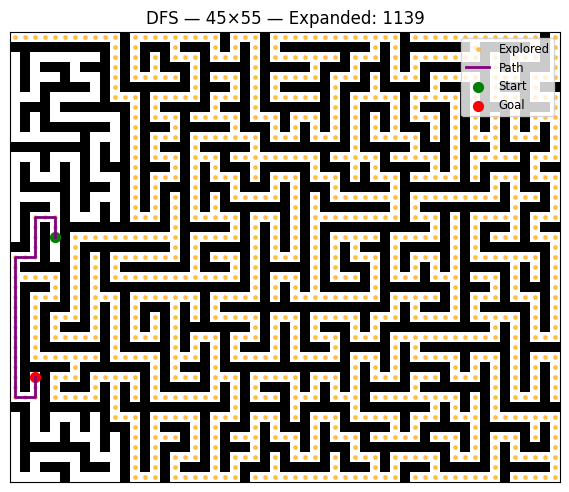

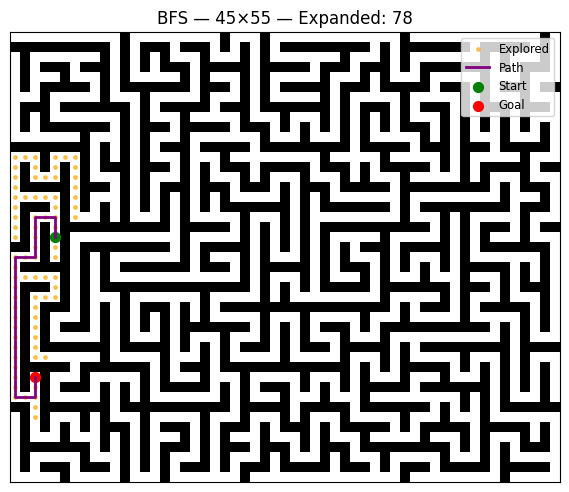

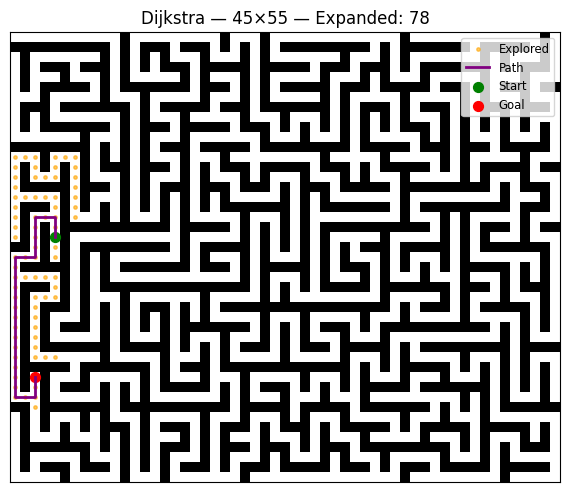

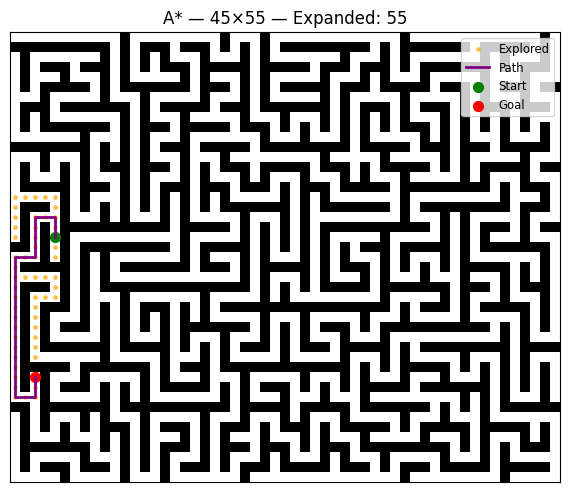

In [2]:
# 2) Correr los experimentos (ajusta rows, cols, mazes si deseas)
df = run_experiments(rows=45, cols=55, k=25)

In [3]:
# 3) Mostrar los primeros resultados
df.head(10)

,Maze,Algorithm,Distance,Expanded,Time_s,Manhattan_AB
0,1,DFS,28,1139,0.001883,16
1,1,BFS,28,78,0.000151,16
2,1,Dijkstra,28,78,0.000160,16
3,1,A*,28,55,0.000132,16
4,2,DFS,581,890,0.001573,39
5,2,BFS,581,1052,0.001850,39
6,2,Dijkstra,581,1054,0.005474,39
7,2,A*,581,1006,0.002827,39
8,3,DFS,194,765,0.001110,30
9,3,BFS,194,639,0.000915,30


In [4]:
# 4) Calcular y mostrar el resumen promedio
summary = analyze_results(df)
summary

,Distance,Expanded,Time_s,Place
Algorithm,,,,
A*,268.64,652.24,0.001555,1.88
DFS,268.64,683.44,0.001047,2.00
BFS,268.64,732.12,0.001089,2.88
Dijkstra,268.64,731.84,0.001703,3.24


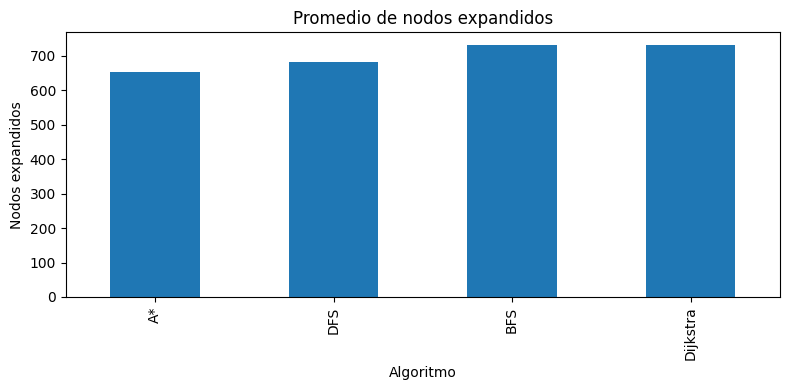

In [5]:
# 5) Gráfico: promedio de nodos expandidos por algoritmo
plt.figure(figsize=(8,4))
summary['Expanded'].plot.bar()
plt.title('Promedio de nodos expandidos')
plt.ylabel('Nodos expandidos')
plt.xlabel('Algoritmo')
plt.tight_layout()
plt.show()

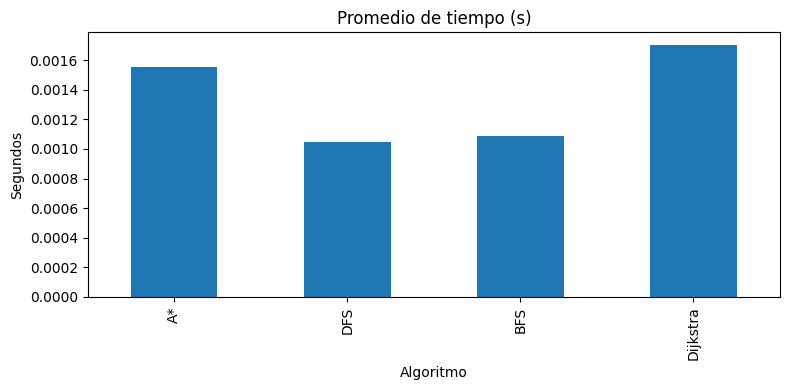

In [6]:
# 6) Gráfico: promedio de tiempo de ejecución por algoritmo
plt.figure(figsize=(8,4))
summary['Time_s'].plot.bar()
plt.title('Promedio de tiempo (s)')
plt.ylabel('Segundos')
plt.xlabel('Algoritmo')
plt.tight_layout()
plt.show()

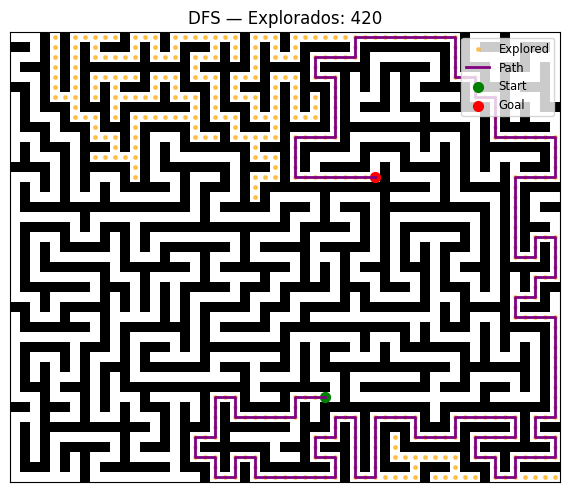

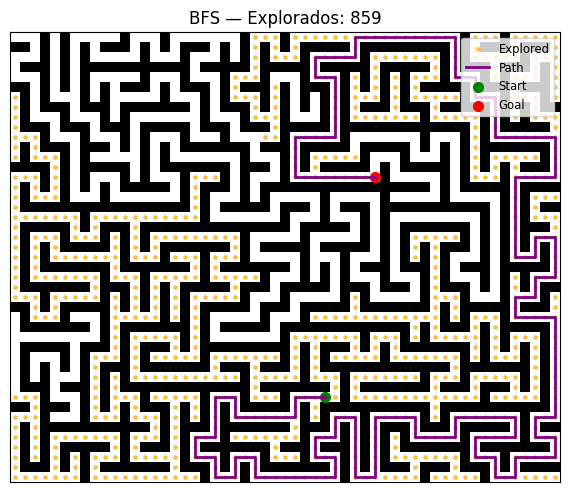

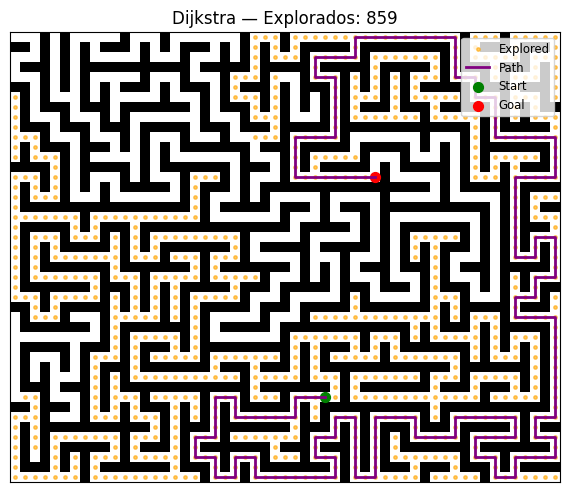

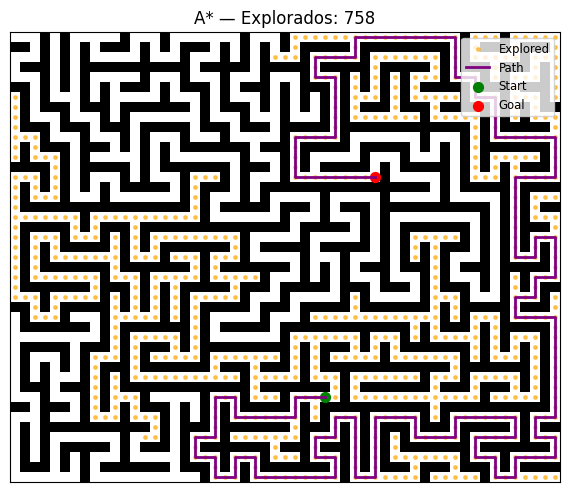

In [7]:
# 7) Visualizar exploración de cada algoritmo en el primer laberinto
from generacion import generate_maze
from endpoints import random_endpoints
from busquedas import dfs, bfs, dijkstra, astar
from visualization import plot_search

# Generar un solo laberinto y endpoints
maze = generate_maze(45, 55)
start, goal = random_endpoints(maze, min_dist=10)

# Para cada algoritmo, ejecutarlo y mostrar la visualización inline
for name, fn in [('DFS', dfs), ('BFS', bfs), ('Dijkstra', dijkstra), ('A*', astar)]:
    path, expanded, explored = fn(maze, start, goal)
    title = f"{name} — Explorados: {expanded}"
    plot_search(
        maze=maze,
        explored=explored,
        path=path,
        start=start,
        goal=goal,
        title=title,
        # omitimos savepath para que se pinte aquí en Jupyter
        savepath=None
    )